**Modern Portfolio Theory (MPT)**

In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd
import re

In [10]:
# From universe of stocks, categorize by beta(SPY,Xi) and Corr(SPY,Xi)
list_tickers = ['AMZN', 'CBOE', 'ECL', 'GE', 'GOOGL', 'KO', 'LDOS', 'MET', 'META', 'MMC', 'MTB', 'PHM', 'QQQ', 'SPY', 'TRGP', 'TXN', 'USB', 'VRTX', 'WDC', 'WFC', 'XOM']
list_tickers += ['RMD', 'D', 'AEP', 'RVTY', 'KEY', 'K', 'MHK', 'NVDA', 'CPB', 'CTLT', 'RTX']
len(list_tickers)

32

In [5]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_start = pd.to_datetime(date_today) - pd.DateOffset(months=36)
date_start = date_start.strftime("%Y-%m-%d")
date_start, date_today

('2021-09-01', '2024-09-01')

In [6]:
portfolio = Engine(
    start_date = date_start,                                      
    portfolio = list_tickers,
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

Start date: 2021-09-01
End date: 2024-09-01


,Backtest
,
Annual return,14.2%
Cumulative return,48.72%
Annual volatility,15.53 %
Winning day ratio,54.98%
Sharpe ratio,0.93
Calmar ratio,0.89
Information ratio,0.0
Stability,0.55
Max Drawdown,-15.85 %


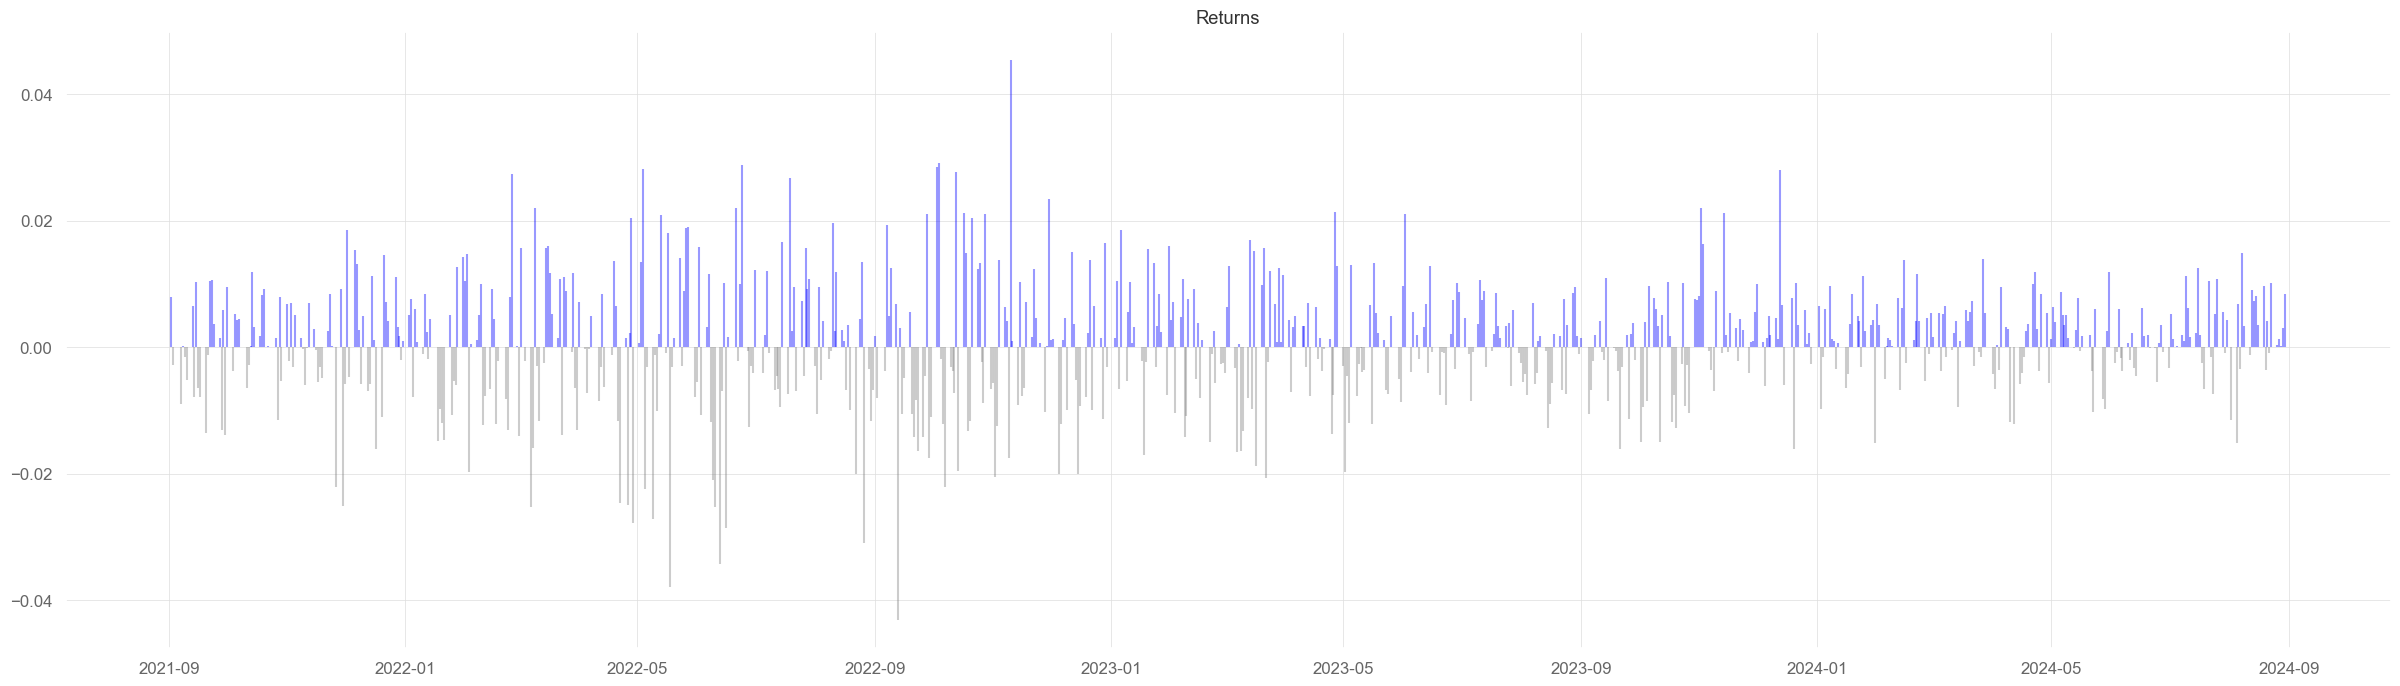

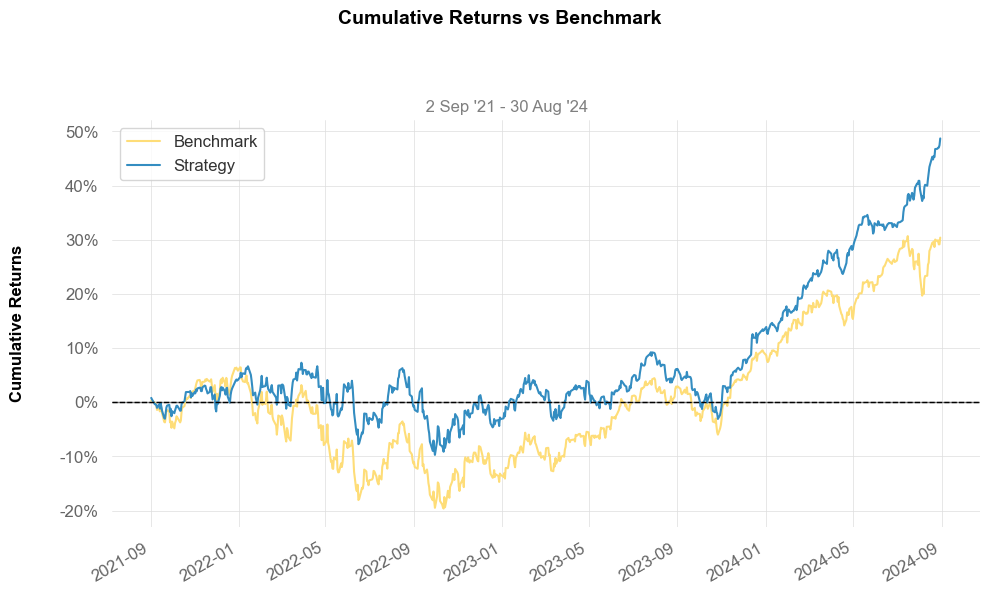

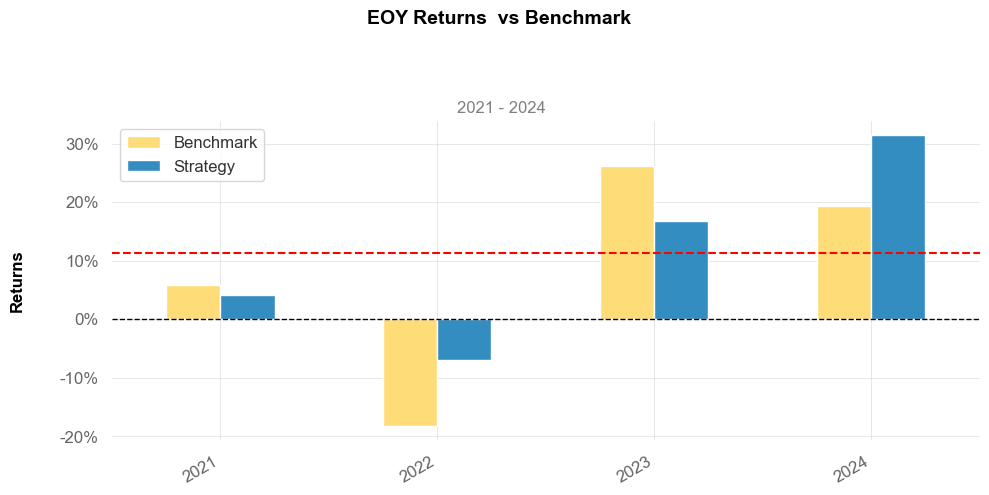

In [7]:
try:
    empyrial(portfolio)
except TypeError as e:
    pass 

# Summary of allocations

In [8]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-10-01,2021-10-31,2021-12-01,2021-12-31,2022-01-31,2022-03-02,2022-04-01,2022-05-02,2022-06-01,2022-07-02,...,2023-12-31,2024-01-31,2024-03-01,2024-03-31,2024-05-01,2024-05-31,2024-07-01,2024-07-31,2024-08-31,2024-09-01
AMZN,0.03409,0.03225,0.03295,0.03409,0.03088,0.02908,0.02818,0.02288,0.02026,0.01808,...,0.02197,0.02220,0.02233,0.02260,0.02272,0.02306,0.02320,0.02352,0.02329,0.02330
CBOE,0.03864,0.03698,0.03651,0.03560,0.03687,0.03803,0.03809,0.03874,0.03964,0.04167,...,0.04643,0.04628,0.04606,0.04578,0.04586,0.04565,0.04533,0.04527,0.04560,0.04560
ECL,0.03096,0.02950,0.03136,0.03155,0.03078,0.03072,0.02845,0.02770,0.02817,0.02793,...,0.02928,0.02946,0.02991,0.03005,0.03031,0.03029,0.03031,0.03043,0.03044,0.03044
GE,0.02172,0.02568,0.02503,0.02433,0.02353,0.02431,0.02614,0.02498,0.02509,0.02470,...,0.03017,0.03023,0.03032,0.03006,0.02988,0.02996,0.02987,0.02976,0.02972,0.02970
GOOGL,0.03091,0.03367,0.03326,0.03313,0.03158,0.03026,0.02925,0.02801,0.02792,0.02682,...,0.02748,0.02758,0.02748,0.02777,0.02769,0.02779,0.02792,0.02809,0.02815,0.02814
KO,0.03523,0.03644,0.03478,0.03663,0.03804,0.04147,0.04196,0.04276,0.04265,0.04456,...,0.04514,0.04478,0.04471,0.04442,0.04418,0.04406,0.04386,0.04379,0.04373,0.04378
LDOS,0.03214,0.03387,0.03460,0.03433,0.03588,0.03975,0.04177,0.04392,0.04501,0.04444,...,0.04133,0.04117,0.04120,0.04109,0.04109,0.04087,0.04067,0.04041,0.04032,0.04032
MET,0.02493,0.02617,0.02660,0.02685,0.02853,0.02912,0.02922,0.02966,0.03122,0.03158,...,0.03119,0.03118,0.03142,0.03149,0.03150,0.03150,0.03148,0.03154,0.03121,0.03121
META,0.03960,0.03391,0.03097,0.02994,0.02756,0.01767,0.01588,0.01408,0.01301,0.01165,...,0.01702,0.01734,0.01723,0.01749,0.01784,0.01806,0.01830,0.01868,0.01892,0.01890
MMC,0.03126,0.03100,0.03361,0.03424,0.03458,0.03496,0.03462,0.03373,0.03412,0.03458,...,0.03696,0.03724,0.03732,0.03732,0.03739,0.03721,0.03710,0.03703,0.03709,0.03705


In [9]:
print("Summary of the portfolio at the most recent date:") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

Summary of the portfolio at the most recent date:


,2024-09-01
AMZN,0.02330
CBOE,0.04560
ECL,0.03044
GE,0.02970
GOOGL,0.02814
KO,0.04378
LDOS,0.04032
MET,0.03121
META,0.01890
MMC,0.03705
